In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

PROFIT ~ RND

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

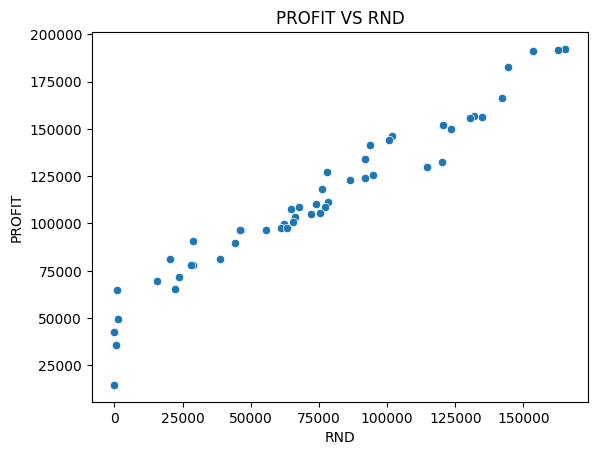

In [9]:
sns.scatterplot(data=df, x='RND', y='PROFIT' )
plt.title('PROFIT VS RND')
plt.show()

Seperate X and Y features

X - RND

Y - PROFIT

In [11]:
X = df[['RND']]
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [12]:
Y = df[['PROFIT']]
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


Create Linear Regression model

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

PROFIT = B0 + B1*RND

Coefficient and intecept

In [14]:
model.coef_

array([[0.85429137]])

In [15]:
model.intercept_

array([49032.89914125])

PROFIT_pred = 49032.89 + 0.8543*RND
RND increases by 1000 , PROFIT increases by 854.3

Checking model R2 Score

In [16]:
model.score(X,Y)

0.9465353160804393

Perform other evaluations on model
Mean Squared Error
Mean Absolute Error
Root Mean Squared Error
R2 Score

In [18]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [26]:
mse = mean_squared_error(Y, ypred)
mse
rmse = mse**(1/2)
rmse

9226.100548285232

In [23]:
mae = mean_absolute_error(Y, ypred)
mae

6910.98435457961

In [24]:
score = r2_score(Y, ypred)
score

0.9465353160804393

Checking how line is fitted

<Axes: xlabel='RND', ylabel='PROFIT'>

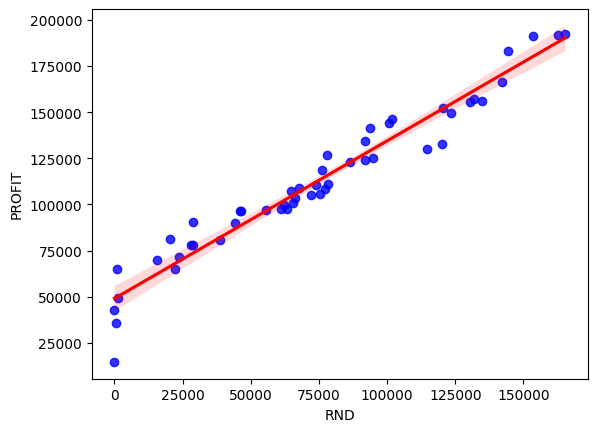

In [27]:
sns.regplot(data=df, x='RND', y='PROFIT', line_kws={'color':'red'}, scatter_kws={'color':'blue'})

PROFIT and RND have a strong Linear Relationship because R2 score is 0.9465

Predict the new values

In [28]:
RND = [[100000]]
profit_pred = model.predict(RND)
profit_pred

array([[134462.03623513]])